Happy Secneario
- How many people happy?
- Why people happy? (category)

Good thing about express as emoji
- User frendly
- intuitive (easy to feel and understand)
- privacy protection (no contents)

In [15]:
import pandas as pd
from bs4 import BeautifulSoup
import re

In [29]:
import nltk

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [30]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonghopark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def create_tokens(text):
    if type(text) == str:
        # process sentence
        tmp = BeautifulSoup(text, "html").text
        tmp= re.sub(r'https?:\/\/[\S]*', '', tmp, flags=re.MULTILINE)

        # process words
        tokenized_words = word_tokenize(tmp)
        filtered_words = [word for word in tokenized_words if word.casefold() not in filter_words]
        stemmed_words = [stemmer.stem(word) for word in filtered_words]
        return stemmed_words
    else:
        return []

In [46]:
stop_words = stopwords.words("english")
filter_words = stop_words + ["'s", "#","'", "``", "-", "(", ")", '"', "-", ":", "|", "/", "@"]

path = "../data/raw/mastodon.csv"
df = pd.read_csv(path)
df = df.loc[df["language"]=="en"]
df['token'] = df['content'].apply(create_tokens)

df.to_csv("./test2.csv")

/var/folders/sm/l6vrftmd479f6k9xsr1dflsr0000gn/T/ipykernel_19722/4232664300.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tmp = BeautifulSoup(text, "html").text


In [48]:
df

,content,created_at,hashtags,language,token
0,<p>If there's any team that could trick this o...,2023-04-26 04:27:53+00:00,['nba'],en,"[team, could, trick, cp3, sun, nba]"
1,<p>This piece was damaged in storage (scratche...,2023-04-26 04:27:51+00:00,[],en,"[piec, damag, storag, scratch, much, small, st..."
2,<p>🇺🇸🇺🇦Draft resolution ‘Ukrainian Victory’ pr...,2023-04-26 04:27:54+00:00,"['wanteddeadoralive', '9yearsofwarinukraine', ...",en,"[🇺🇸🇺🇦draft, resolut, ‘, ukrainian, victori, ’,..."
3,<p>AFL does not regret past concussion managem...,2023-04-26 04:27:37+00:00,['news'],en,"[afl, regret, past, concuss, manag, say, under..."
4,"<p>""Our whole spiritual transformation brings ...",2023-04-26 04:27:55+00:00,[],en,"[whole, spiritu, transform, bring, us, point, ..."
...,...,...,...,...,...
87271,"<p><a href=""https://fairdinkum.one/tags/auspol...",2023-04-28 09:15:20+00:00,['auspol'],en,"[auspol, pm, ,, nightclub, mogul, former, conv..."
87273,"<p>In France, cities smaller than Kirikiriroa ...",2023-04-28 09:16:03+00:00,[],en,"[franc, ,, citi, smaller, kirikiriroa, tram, l..."
87275,<p>XTDB - an open-source Datomic alternative <...,2023-04-28 09:16:02+00:00,"['clojure', 'databases']",en,"[xtdb, open-sourc, datom, altern, clojur, data..."
87277,<p>How to make the most of Apache Kafka - To r...,2023-04-28 09:15:22+00:00,"['database', 'analytics', 'datamanagement', 's...",en,"[make, apach, kafka, realli, understand, apach..."


### Approach
## happiness Score
- Remove neutral words
- Calculate word frequency (Accuracy VS computing)
     - computing: calculate frequency in indiviual text.
     - accuracy: calcualte frequency in whole data set.
- Calculate happiness score base on frequency (see formula)
<br>
<br>
- We will compare and see the difference
    - How much different?
    - Try anova => choose simple model! 

In [92]:
df["score"] = 0

h_index = pd.read_csv('../data/raw/happiness_index/labMIT1.csv') #keep neutral words
h_index = h_index.loc[(h_index['happiness_average'] >= 5.5) | (h_index['happiness_average'] <= 4.5)] #eliminate neutral words
h_index = h_index[['#word', 'happiness_average']]
h_index.set_index(keys='#word', inplace=True)
h_dict = h_index.to_dict()['happiness_average']
h_dict

{'laughter': 8.5,
 'happiness': 8.44,
 'love': 8.42,
 'happy': 8.3,
 'laughed': 8.26,
 'laugh': 8.22,
 'laughing': 8.2,
 'excellent': 8.18,
 'laughs': 8.18,
 'joy': 8.16,
 'successful': 8.16,
 'win': 8.12,
 'rainbow': 8.1,
 'smile': 8.1,
 'won': 8.1,
 'pleasure': 8.08,
 'smiled': 8.08,
 'rainbows': 8.06,
 'winning': 8.04,
 'celebration': 8.02,
 'enjoyed': 8.02,
 'healthy': 8.02,
 'music': 8.02,
 'celebrating': 8.0,
 'congratulations': 8.0,
 'weekend': 8.0,
 'celebrate': 7.98,
 'comedy': 7.98,
 'jokes': 7.98,
 'rich': 7.98,
 'victory': 7.98,
 'christmas': 7.96,
 'free': 7.96,
 'friendship': 7.96,
 'fun': 7.96,
 'holidays': 7.96,
 'loved': 7.96,
 'loves': 7.96,
 'loving': 7.96,
 'beach': 7.94,
 'hahaha': 7.94,
 'kissing': 7.94,
 'sunshine': 7.94,
 'beautiful': 7.92,
 'delicious': 7.92,
 'friends': 7.92,
 'funny': 7.92,
 'outstanding': 7.92,
 'paradise': 7.92,
 'sweetest': 7.92,
 'vacation': 7.92,
 'butterflies': 7.92,
 'freedom': 7.9,
 'flower': 7.88,
 'great': 7.88,
 'sunlight': 7.88,
 

In [103]:
def happiness_score(words):
    h_score = 0
    count = 0
    if len(words) != 0:
        for w in words:
            if w in h_dict:
                h_score += h_dict[w]
                count += 1
        if count != 0:
            return h_score / count
        return 0
    return 0

In [104]:
df['h_score'] = df['token'].apply(happiness_score)
df

,content,created_at,hashtags,language,token,score,h_score
0,<p>If there's any team that could trick this o...,2023-04-26 04:27:53+00:00,['nba'],en,"[team, could, trick, cp3, sun, nba]",0,6.526667
1,<p>This piece was damaged in storage (scratche...,2023-04-26 04:27:51+00:00,[],en,"[piec, damag, storag, scratch, much, small, st...",0,5.708889
2,<p>🇺🇸🇺🇦Draft resolution ‘Ukrainian Victory’ pr...,2023-04-26 04:27:54+00:00,"['wanteddeadoralive', '9yearsofwarinukraine', ...",en,"[🇺🇸🇺🇦draft, resolut, ‘, ukrainian, victori, ’,...",0,6.040000
3,<p>AFL does not regret past concussion managem...,2023-04-26 04:27:37+00:00,['news'],en,"[afl, regret, past, concuss, manag, say, under...",0,5.530000
4,"<p>""Our whole spiritual transformation brings ...",2023-04-26 04:27:55+00:00,[],en,"[whole, spiritu, transform, bring, us, point, ...",0,6.070000
...,...,...,...,...,...,...,...
87271,"<p><a href=""https://fairdinkum.one/tags/auspol...",2023-04-28 09:15:20+00:00,['auspol'],en,"[auspol, pm, ,, nightclub, mogul, former, conv...",0,6.284000
87273,"<p>In France, cities smaller than Kirikiriroa ...",2023-04-28 09:16:03+00:00,[],en,"[franc, ,, citi, smaller, kirikiriroa, tram, l...",0,4.900000
87275,<p>XTDB - an open-source Datomic alternative <...,2023-04-28 09:16:02+00:00,"['clojure', 'databases']",en,"[xtdb, open-sourc, datom, altern, clojur, data...",0,0.000000
87277,<p>How to make the most of Apache Kafka - To r...,2023-04-28 09:15:22+00:00,"['database', 'analytics', 'datamanagement', 's...",en,"[make, apach, kafka, realli, understand, apach...",0,6.145000


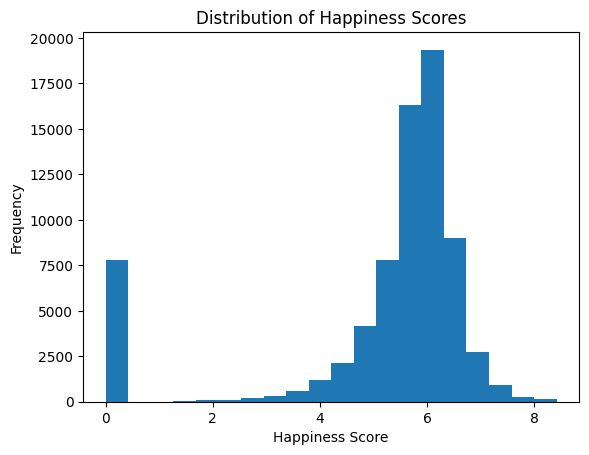

In [105]:
plt.hist(df['h_score'], bins=20)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

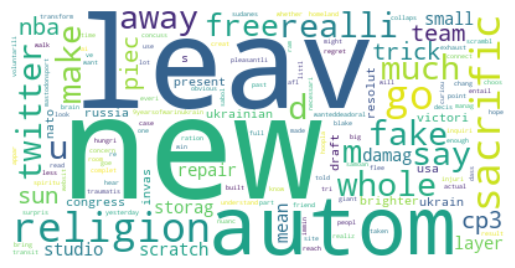

In [76]:
words =[]
for i, row in df.iterrows():
    words += row["token"]

# join the list and lowercase all the words
text = ' '.join(words).lower()
text = text[:1200]

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, background_color='white').generate(text)

#plot the wordcloud object
# cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 
# 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot'
plt.imshow(wordcloud, interpolation='bilInear', cmap='BrBG_r')
# plt.gcf().set_facecolor("white")
plt.axis('off')
plt.show()

In [65]:

# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_
print(list(rel_freq.items())[:100])

[('one', 1.0), ('press', 0.9134819532908705), ('new', 0.8723460721868365), ('use', 0.7627388535031847), ('peopl', 0.6820594479830149), ('work', 0.6754246284501062), ('time', 0.6441082802547771), ('today', 0.6204883227176221), ('say', 0.6050955414012739), ('make', 0.5958067940552016), ('go', 0.5865180467091295), ('look', 0.5586518046709129), ('m', 0.5437898089171974), ("n't", 0.5294585987261147), ('u', 0.5289278131634819), ('day', 0.523619957537155), ('think', 0.487791932059448), ('need', 0.4769108280254777), ('thing', 0.4676220806794055), ('see', 0.445859872611465), ('first', 0.4286093418259023), ('want', 0.416135881104034), ('even', 0.40445859872611467), ('good', 0.387208067940552), ('start', 0.3832271762208068), ('love', 0.38163481953290873), ('call', 0.38030785562632696), ('right', 0.3739384288747346), ('game', 0.3734076433121019), ('way', 0.37154989384288745), ('know', 0.36491507430997877), ('re', 0.3622611464968153), ('come', 0.3617303609341826), ('still', 0.35934182590233543), ('